In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data_path = r"C:\Users\Sukanmi\Desktop\Data analysis\Employee_Performance_Analysis\data\Extended_Employee_Performance_and_Productivity_Data.csv"
df = pd.read_csv(data_path)


In [4]:
# Display basic info about the dataset
print("\nDataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-

In [5]:
# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


First 5 Rows:
   Employee_ID        Department  Gender  Age   Job_Title  \
0            1                IT    Male   55  Specialist   
1            2           Finance    Male   29   Developer   
2            3           Finance    Male   55  Specialist   
3            4  Customer Support  Female   48     Analyst   
4            5       Engineering  Female   36     Analyst   

                    Hire_Date  Years_At_Company Education_Level  \
0  2022-01-19 08:03:05.556036                 2     High School   
1  2024-04-18 08:03:05.556036                 0     High School   
2  2015-10-26 08:03:05.556036                 8     High School   
3  2016-10-22 08:03:05.556036                 7        Bachelor   
4  2021-07-23 08:03:05.556036                 3        Bachelor   

   Performance_Score  Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  \
0                  5          6750.0                   33                32   
1                  5          7500.0                   34

In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64


In [7]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         Employee_ID            Age  Years_At_Company  Performance_Score  \
count  100000.000000  100000.000000     100000.000000      100000.000000   
mean    50000.500000      41.029410          4.476070           2.995430   
std     28867.657797      11.244121          2.869336           1.414726   
min         1.000000      22.000000          0.000000           1.000000   
25%     25000.750000      31.000000          2.000000           2.000000   
50%     50000.500000      41.000000          4.000000           3.000000   
75%     75000.250000      51.000000          7.000000           4.000000   
max    100000.000000      60.000000         10.000000           5.000000   

       Monthly_Salary  Work_Hours_Per_Week  Projects_Handled  Overtime_Hours  \
count   100000.000000        100000.000000     100000.000000   100000.000000   
mean      6403.211000            44.956950         24.431170       14.514930   
std       1372.508717             8.942003         14.

In [8]:
# Data Cleaning: Handle missing values
df.fillna(method='ffill', inplace=True)

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_5652\3856623137.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")  # Set grid style for better aesthetics

In [11]:
print(df.columns)  # Check the exact column names


Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')


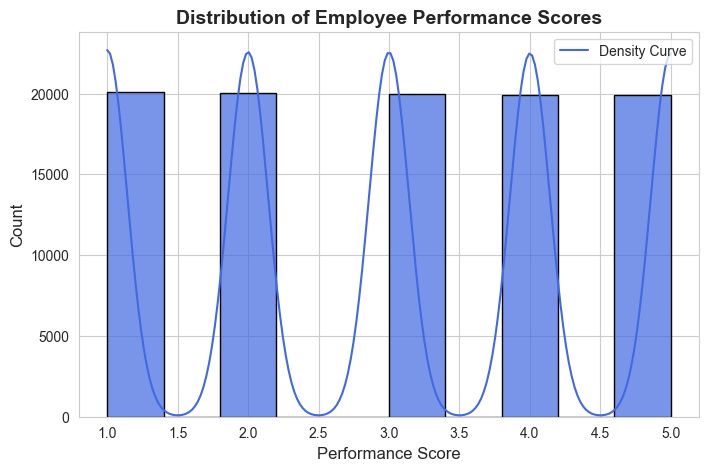

In [12]:
# Distribution of Employee Performance Scores
plt.figure(figsize=(8,5))
sns.histplot(df['Performance_Score'], bins=10, kde=True, color='royalblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Employee Performance Scores', fontsize=14, fontweight='bold')
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(["Density Curve"], loc='upper right')
plt.show()

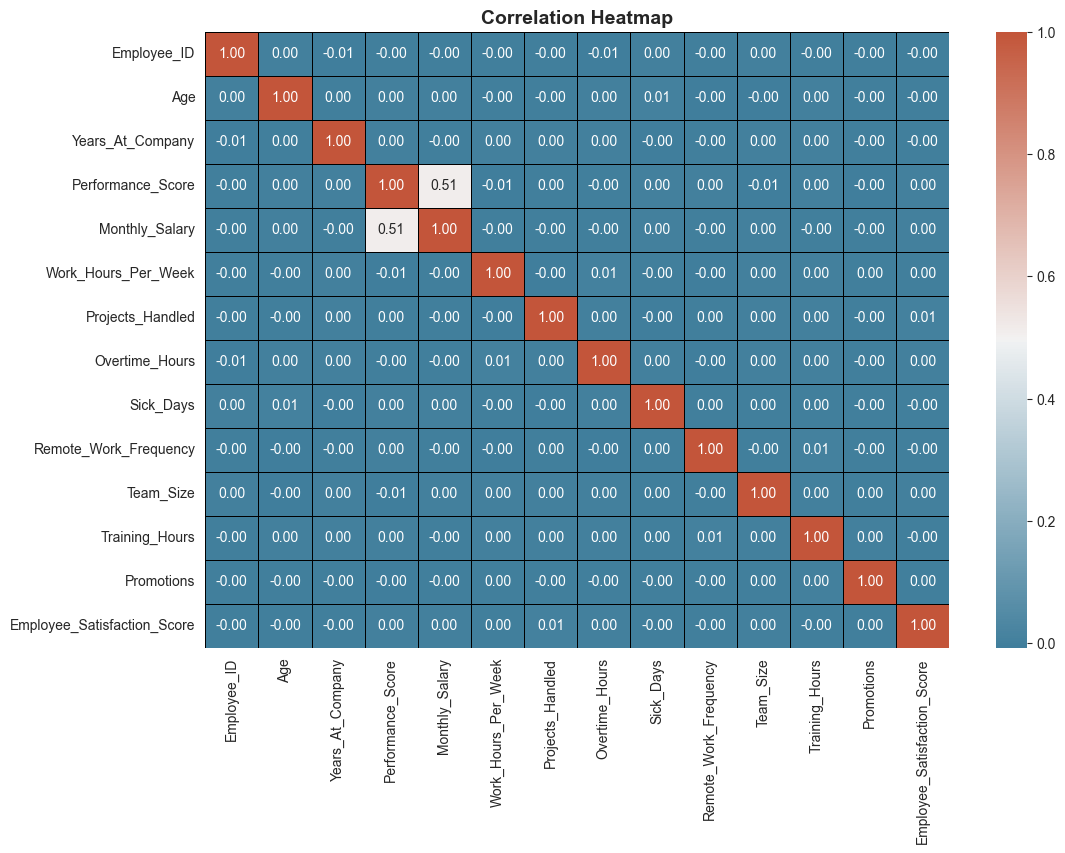

In [14]:
# Correlation Heatmap (Only Numeric Columns)
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['number'])  # Select only numerical columns
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numeric_df.corr(), annot=True, cmap=cmap, fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_5652\4003494738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Performance_Score', data=df, palette='coolwarm')


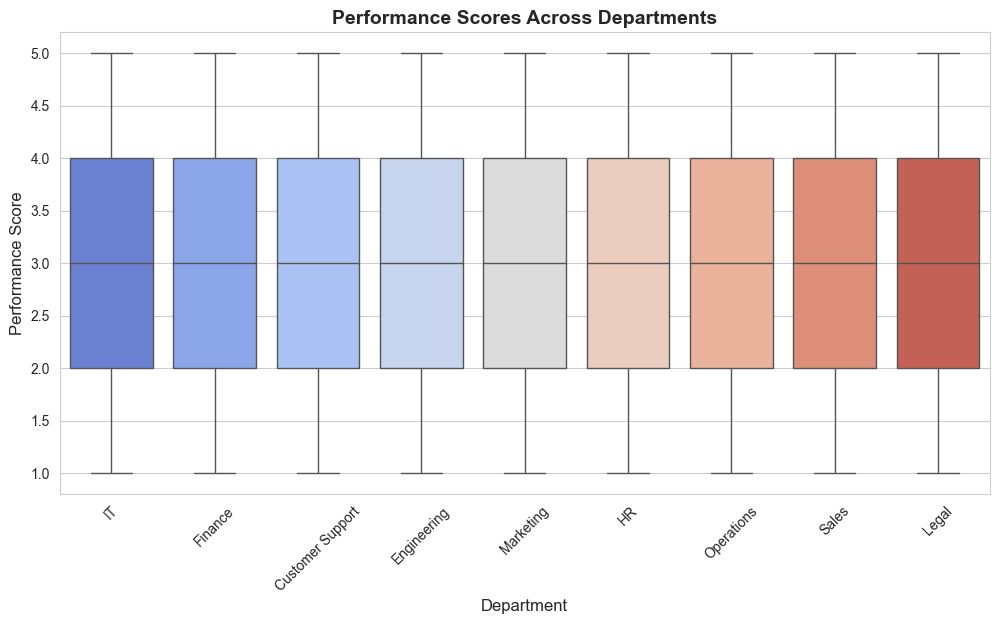

In [15]:
# Performance Score by Department
plt.figure(figsize=(12,6))
sns.boxplot(x='Department', y='Performance_Score', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Performance Scores Across Departments', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.show()

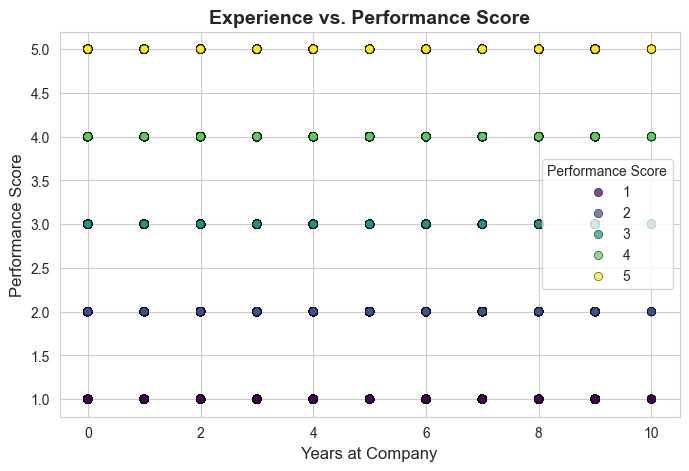

In [17]:
# Relationship between Experience and Performance
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Years_At_Company'], y=df['Performance_Score'], 
                alpha=0.7, hue=df['Performance_Score'], palette='viridis', 
                edgecolor='black')

plt.title('Experience vs. Performance Score', fontsize=14, fontweight='bold')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.legend(title='Performance Score')  # Corrected legend
plt.show()


C:\Users\Sukanmi\AppData\Local\Temp\ipykernel_5652\2418440472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Monthly_Salary', data=df, palette='pastel')


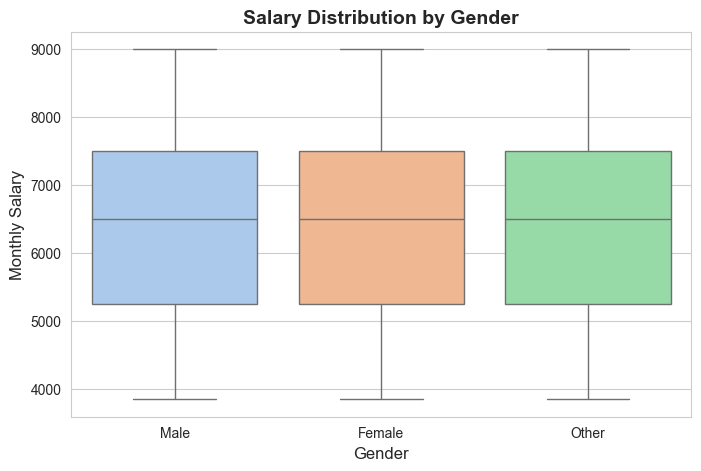

In [18]:
# Salary Distribution by Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Monthly_Salary', data=df, palette='pastel')
plt.title('Salary Distribution by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Monthly Salary', fontsize=12)
plt.show()

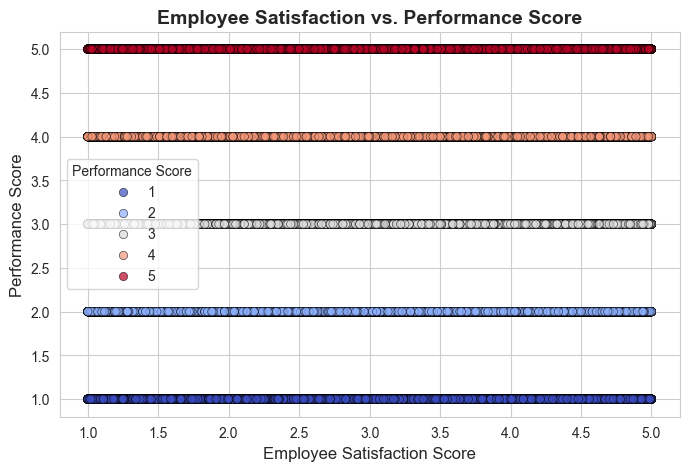

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Employee_Satisfaction_Score'], y=df['Performance_Score'], 
                alpha=0.7, hue=df['Performance_Score'], palette='coolwarm', 
                edgecolor='black')

plt.title('Employee Satisfaction vs. Performance Score', fontsize=14, fontweight='bold')
plt.xlabel('Employee Satisfaction Score', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.legend(title='Performance Score')  # Corrected legend
plt.show()


In [21]:
# Save cleaned data
df.to_csv("../data/cleaned_employee_data.csv", index=False)